<a href="https://colab.research.google.com/github/joshIsac/Reinforcement-learning/blob/main/2348523_CIA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Epsilon greedy algorithm is one of the mainly involving in balancing the exploitation in multi armed bandit

exploration can be defined gathering more information in order for the agent to get the reward which will be highest

and exploitation selecting the most suitable reward which is maximum






In [44]:
class epsilon_greedy:
    def __init__(self, n_slot_machines, n_rounds, epsilon):
        self.n_slot_machines = n_slot_machines
        self.n_rounds = n_rounds
        self.epsilon = epsilon
        self.tot_rewards = 0
        self.selection = np.zeros(n_slot_machines)
        self.total_rewards = np.zeros(n_slot_machines)
        self.estimated_rewards_over_time = np.zeros((n_rounds, n_slot_machines))  # Store rewards over time

    # function to select machines
    def select_machines(self):
        # Explore with probability ε
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_slot_machines)  # Random machine selection
        else:
            # Exploit: choose the machine with the highest average reward
            return np.argmax(self.total_rewards / (self.selection + 1e-5))

    # update the reward estimates
    def update_rewards(self, machine, reward):
        self.selection[machine] += 1
        self.total_rewards[machine] += reward

    # simulate the epsilon greedy algorithm
    def simulate_epsilon_greedy(self):
        true_probabilities = np.random.rand(self.n_slot_machines)  # Unknown probabilities for each machine

        for round in range(self.n_rounds):
            machine = self.select_machines()
            # Simulate reward based on the chosen machine
            reward = 1 if np.random.rand() < true_probabilities[machine] else 0

            # Updating the reward based on the number of selections
            self.update_rewards(machine, reward)
            self.tot_rewards += reward

            # Store the estimated rewards for each machine at this round
            self.estimated_rewards_over_time[round] = self.total_rewards / (self.selection + 1e-5)

        return self.tot_rewards, self.total_rewards / (self.selection + 1e-5), self.selection, true_probabilities

# Run the simulation
n_slot_machines = 3
n_rounds = 100
epsilon = 0.1

agent = epsilon_greedy(n_slot_machines, n_rounds, epsilon)
total_rewards, estimated_rewards, selection, true_probabilities = agent.simulate_epsilon_greedy()

# Print the rewards
print(f"Total Reward: {total_rewards}")
print(f"Estimated Rewards: {estimated_rewards}")
print(f"Machine Play Counts: {selection}")
print(f"True Probabilities: {true_probabilities}")


Total Reward: 59
Estimated Rewards: [0.61176463 0.49999917 0.44444395]
Machine Play Counts: [85.  6.  9.]
True Probabilities: [0.63067127 0.66859432 0.52744576]


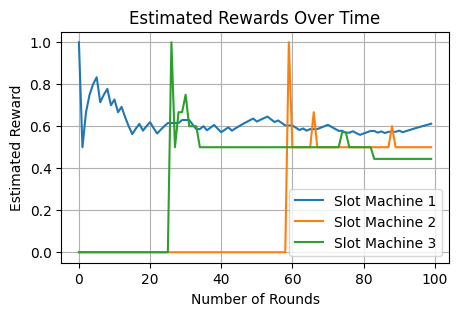

In [45]:
# Plot the estimated rewards over time
plt.figure(figsize=(6,3))
for i in range(n_slot_machines):
    plt.plot(agent.estimated_rewards_over_time[:, i], label=f'Slot Machine {i+1}')

plt.title('Estimated Rewards Over Time')
plt.xlabel('Number of Rounds')
plt.ylabel('Estimated Reward')
plt.legend()
plt.grid()
plt.show()

in the scenario of slot machines we have 3 slot machine where a user uses it in order to achieve the reward

we are not sure of what kind of reward we get which completely unknown to the user who is playing the slot machine

thus this approach of epsilon greedy allows us to estimate the actual probabilities in for each machine depending on the no of rounds  as it changes over time

